In [2]:
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

%matplotlib inline

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

from scipy.interpolate import UnivariateSpline

image_path="/Users/heidihurst/Documents/UK/ucl-gis/dissertation/screenshots_images/"

In [4]:
name={"t7":"Downsample (T1)","t9":"Upsample (T2)"}

## Plot Information for Single Evaluation

In [10]:
trial="t7"
csv_folder="../analysis/{}_eval_classification_loss/".format(trial)
csv_name="run_{}_ssd_inception_car_2_eval-tag-Losses_Loss_classification_loss.csv".format(trial)
csv_path=csv_folder+csv_name

In [11]:
test_15 = pd.read_csv(csv_path)

In [15]:
# extract minimums
minpt = test_15[test_15["Value"] == min(test_15["Value"])]

In [16]:
# create spline
spl = UnivariateSpline(test_15["Step"], test_15["Value"], )

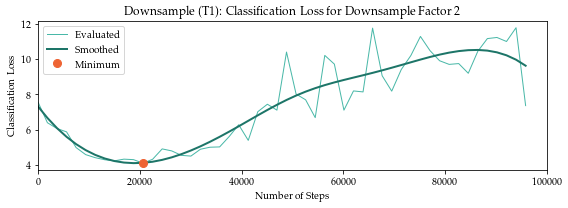

In [23]:
test="2"
main_color='#1d7568'
secondary_color='#49b8a8'
accent_color='#EE6434'

fs=(8,3)

plt.figure(figsize=fs)
# spline smoothing factor is set based on heuristics
spl.set_smoothing_factor(45)
plt.plot(test_15["Step"], test_15["Value"], color=secondary_color, lw=1, label="Evaluated")
plt.plot(test_15["Step"], spl(test_15["Step"]), color=main_color, lw=2, label="Smoothed")
plt.plot(minpt["Step"], minpt["Value"], color=accent_color, marker='o', markersize=8, lw=0, label="Minimum")
plt.xlim([0, 100000])

plt.title("{}: Classification Loss for Downsample Factor {}".format(name[trial],test))
plt.xlabel("Number of Steps")
plt.ylabel("Classification Loss")
plt.legend()
# plt.show()
figname = image_path + "class_loss_{}_df{}".format(trial, int(float(test)*10))
plt.savefig(figname, dpi=300)

In [33]:
def plot_loss(factor="1", trial="t9", sf=75, subplot=True, save=False, plotpath=""):
    # plot for any value, just change dsf and rerun
    csv_folder="../analysis/{}_eval_classification_loss/".format(trial)
    csv_name="run_{}_ssd_inception_car_{}_eval-tag-Losses_Loss_classification_loss.csv".format(trial, factor)
    csv_path=csv_folder+csv_name
    results = pd.read_csv(csv_path)
    # extract minimums
    minpt_results = results[results["Value"] == min(results["Value"])]
    # create spline
    spl = UnivariateSpline(results["Step"], results["Value"], )
    
    plt.figure(figsize=fs)
    

    main_color='#1d7568'
    secondary_color='#49b8a8'
    accent_color='#EE6434'
    if not subplot:
        plt.clf()
        plt.figure(figsize=fs)
    # spline smoothing factor is set based on heuristics
    spl.set_smoothing_factor(sf)
    plt.plot(results["Step"], results["Value"], color=secondary_color, lw=1, label="Evaluated")
    plt.plot(results["Step"], spl(results["Step"]), color=main_color, lw=2, label="Smoothed")
    plt.plot(minpt_results["Step"], minpt_results["Value"], color=accent_color, marker='o', markersize=8, lw=0, label="Minimum")
    plt.xlim([0, 100000])
    
    if not subplot:
        plt.title("{}: Classification Loss Downsample Factor {}".format(name[trial],factor))
        plt.xlabel("Number of Steps")
        plt.ylabel("Classification Loss")
        plt.legend()
#         plt.show()
        if save:
            plt.savefig(plotpath+"class_loss_trial_{}_df{}".format(trial, factor), dpi=300)
        
    
        
#     plt.savefig(plotpath+"class_loss_trial_{}_df{}".format(trial, factor), dpi=300)

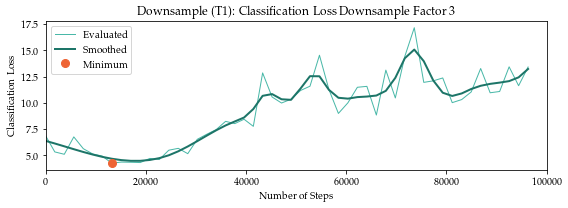

In [36]:
# plt.rcParams['figure.figsize'] = [10,5]
plot_loss("3", "t7",50, subplot=False, save=True, plotpath=image_path)

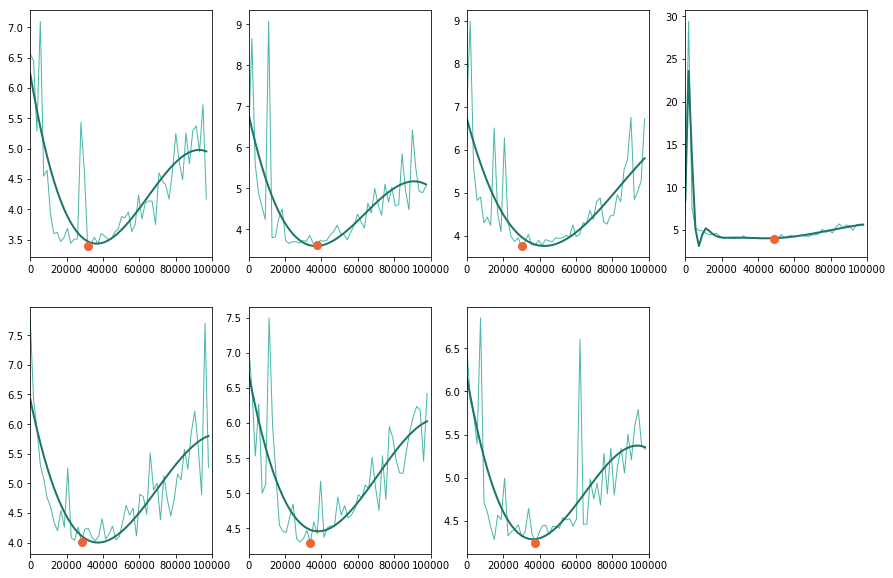

In [54]:
factors=["1", "1.5", "2", "2.5", "3", "3.5", "4"]
i = 1
plt.rcParams['figure.figsize'] = [15, 10]
for factor in factors:
    plt.subplot(240+i)
    i+=1
    plot_loss(factor, sf=75)
#     plot_loss(factor, trial="t7")

## Extract Trough Location

In [45]:
# for loop to iterate through all, import, get minimums
trial="t9"
csv_folder="../analysis/{}_eval_classification_loss/".format(trial)
csv_name="run_{}_ssd_inception_car_{}_eval-tag-Losses_Loss_classification_loss.csv"
csv_path=csv_folder+csv_name
all_mins09=np.empty([7,3])
for i in range(7):
    step=(i+2)*0.5
    if int(step)==step:
        df = pd.read_csv(csv_path.format(trial,int(step)))
    else:
        df = pd.read_csv(csv_path.format(trial,step))
    minpt = df[df["Value"] == min(df["Value"])]
    all_mins09[i]=[step, int(minpt["Step"]), float(minpt["Value"])]
    

In [46]:
# for loop to iterate through all, import, get minimums
trial="t7"
csv_folder="../analysis/{}_eval_classification_loss/".format(trial)
csv_name="run_{}_ssd_inception_car_{}_eval-tag-Losses_Loss_classification_loss.csv"
csv_path=csv_folder+csv_name
all_mins07=np.empty([7,3])
for i in range(7):
    step=(i+2)*0.5
    if int(step)==step:
        df = pd.read_csv(csv_path.format(trial,int(step)))
    else:
        df = pd.read_csv(csv_path.format(trial,step))
    minpt = df[df["Value"] == min(df["Value"])]
    all_mins07[i]=[step, int(minpt["Step"]), float(minpt["Value"])]

## Plot Information about Trough Location

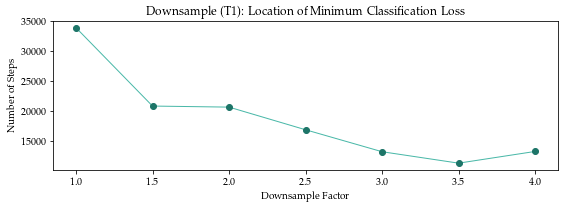

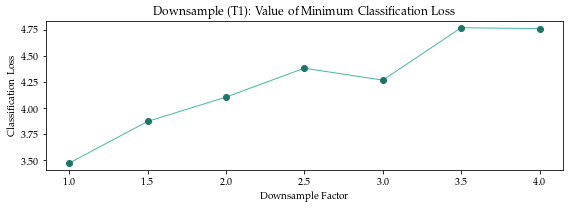

In [51]:
plt.figure(figsize=fs)
plt.plot(all_mins07[:,0], all_mins07[:,1], color=secondary_color, lw=1)
plt.plot(all_mins07[:,0], all_mins07[:,1], color=main_color, linestyle='', marker='o')
plt.title("{}: Location of Minimum Classification Loss".format(name["t7"]))
plt.xlabel("Downsample Factor")
plt.ylabel("Number of Steps")


plt.figure(figsize=fs)
plt.plot(all_mins07[:,0], all_mins07[:,2], color=secondary_color, lw=1)
plt.plot(all_mins07[:,0], all_mins07[:,2], color=main_color, linestyle='', marker='o')
plt.title("{}: Value of Minimum Classification Loss".format(name["t7"]))
plt.xlabel("Downsample Factor")
plt.ylabel("Classification Loss")

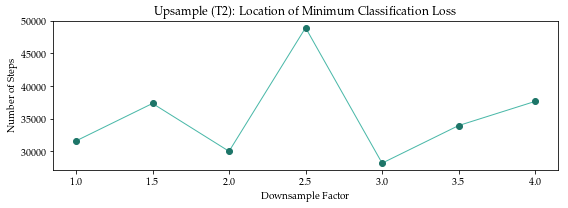

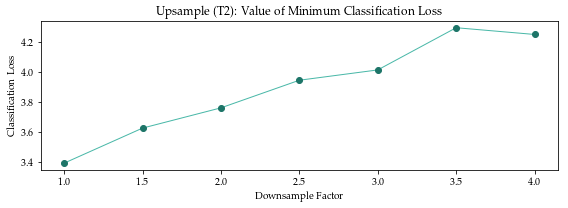

In [49]:
plt.figure(figsize=fs)
plt.plot(all_mins09[:,0], all_mins09[:,1], color=secondary_color, lw=1)
plt.plot(all_mins09[:,0], all_mins09[:,1], color=main_color, linestyle='', marker='o')
plt.title("{}: Location of Minimum Classification Loss".format(name["t9"]))
plt.xlabel("Downsample Factor")
plt.ylabel("Number of Steps")

plt.figure(figsize=fs)
plt.plot(all_mins09[:,0], all_mins09[:,2], color=secondary_color, lw=1)
plt.plot(all_mins09[:,0], all_mins09[:,2], color=main_color, linestyle='', marker='o')
plt.title("{}: Value of Minimum Classification Loss".format(name["t9"]))
plt.xlabel("Downsample Factor")
plt.ylabel("Classification Loss")


In [56]:
all_mins

array([[  1.00000000e+00,   3.16070000e+04,   3.39264894e+00],
       [  1.50000000e+00,   3.73460000e+04,   3.62595177e+00],
       [  2.00000000e+00,   3.00170000e+04,   3.76073861e+00],
       [  2.50000000e+00,   4.89390000e+04,   3.94461560e+00],
       [  3.00000000e+00,   2.82030000e+04,   4.01320171e+00],
       [  3.50000000e+00,   3.39600000e+04,   4.29409361e+00],
       [  4.00000000e+00,   3.76620000e+04,   4.24928808e+00]])

In [59]:
# write this information to a csv file
np.set_printoptions(suppress=True)
np.savetxt("../analysis/{}_trough_information.csv".format(trial),all_mins, delimiter=',')

In [57]:
all_mins[:,1]

array([ 31607.,  37346.,  30017.,  48939.,  28203.,  33960.,  37662.])

In [58]:
trial

't9'